#API access to market data#
- Sep 19, 2022

Several options
  1. Built into the pandas library
  2. 'yfinance' tool
  3. Trading platform 'Quantopian' 
  4. The data provider 'Quandl'
  5. 'Zipline' backtesting library


#1.Remote data access using pandas

The pandas library enables access to data displayed on websites using the ``read_html()`` function and access to the API endpoints of various data providers through the related ``pandas-datareader`` library.

In [2]:
# Import and Settings
import warnings
warnings.filterwarnings('ignore')

In [4]:
pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 7.0 MB/s 


In [15]:
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

## Download html table with SP500 constituents

The download of the content of one or more html tables works as follows, for instance for the constituents of the S&P500 index from Wikipedia

In [6]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [7]:
sp500_constituents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   SEC filings            503 non-null    object
 3   GICS Sector            503 non-null    object
 4   GICS Sub-Industry      503 non-null    object
 5   Headquarters Location  503 non-null    object
 6   Date first added       458 non-null    object
 7   CIK                    503 non-null    int64 
 8   Founded                503 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.5+ KB


In [8]:
sp500_constituents.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


##pandas-datareader for Market Data

``pandas`` used to facilitate access to data providers' APIs directly, but this functionality has moved to the related pandas-datareader library. The stability of the APIs varies with provider policies, and as of June 2o18 at version 0.7, the following sources are available
- https://pandas-datareader.readthedocs.io/en/latest/ 

### Stooq
Google finance stopped providing common index data download. The Stooq site had this data for download for a while but is currently broken, awaiting release of fix

In [28]:
index_url = 'https://stooq.com/t/'
ix = pd.read_html(index_url)
len(ix)

49

In [29]:
sp500_stooq = web.DataReader('^SPX', 'stooq')
sp500_stooq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-09-16 to 2017-09-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


In [30]:
sp500_stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-16,3880.95,3880.95,3837.08,3873.33,4.357111e+09
2022-09-15,3932.41,3959.14,3888.28,3901.35,2.510591e+09
2022-09-14,3940.73,3961.94,3912.18,3946.01,2.482078e+09
2022-09-13,4037.12,4037.12,3921.28,3932.69,2.641640e+09
2022-09-12,4083.67,4119.28,4083.67,4110.41,2.144187e+09


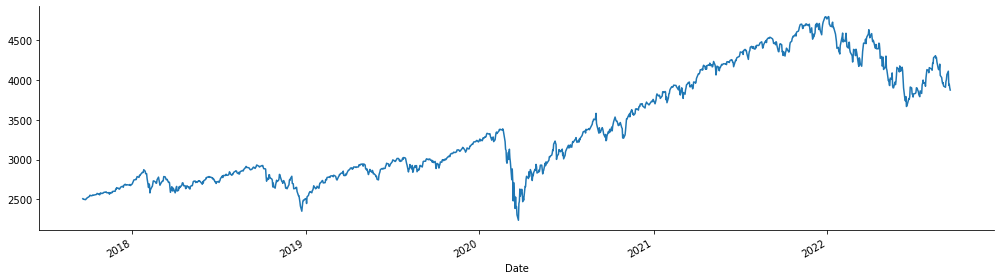

In [31]:
sp500_stooq.Close.plot(figsize=(14,4))
sns.despine()
plt.tight_layout()

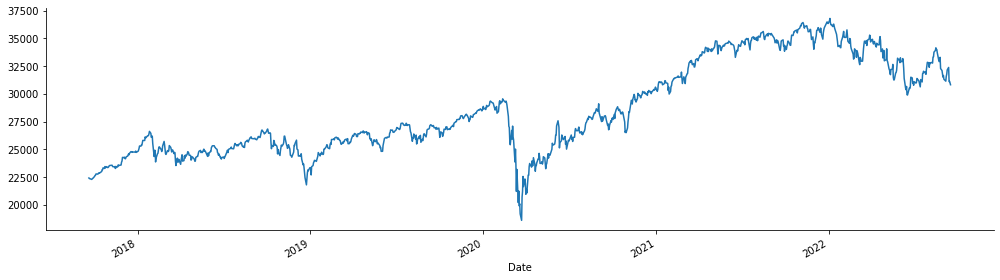

In [38]:
dow = web.DataReader('^DJI', 'stooq')
dow.Close.plot(figsize=(14,4))
sns.despine()
plt.tight_layout()

###NASDAQ Symbols

In [32]:
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12203 entries, A to ZYXI
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nasdaq Traded     12203 non-null  bool    
 1   Security Name     12203 non-null  object  
 2   Listing Exchange  12203 non-null  category
 3   Market Category   12203 non-null  object  
 4   ETF               12203 non-null  bool    
 5   Round Lot Size    12203 non-null  float64 
 6   Test Issue        12203 non-null  bool    
 7   Financial Status  5720 non-null   category
 8   CQS Symbol        6483 non-null   object  
 9   NASDAQ Symbol     12202 non-null  object  
 10  NextShares        12203 non-null  bool    
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 643.9+ KB


In [37]:
print(symbols.loc['IBM'])

Nasdaq Traded                                                    True
Security Name       International Business Machines Corporation Co...
Listing Exchange                                                    N
Market Category                                                      
ETF                                                             False
Round Lot Size                                                  100.0
Test Issue                                                      False
Financial Status                                                  NaN
CQS Symbol                                                        IBM
NASDAQ Symbol                                                     IBM
NextShares                                                      False
Name: IBM, dtype: object


### World Bank

In [33]:
from pandas_datareader import wb
gdp_variables = wb.search('gdp.*capita.*const')
gdp_variables.head()

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10522,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10524,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10526,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10527,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [34]:
wb_data = wb.download(indicator='NY.GDP.PCAP.KD', 
                      country=['US', 'CA', 'MX'], 
                      start=1990, 
                      end=2019)
wb_data.head()

NY.GDP.PCAP.KD
country year                
Canada  2019    45109.244486
        2018    44917.483728
        2017    44325.488337
        2016    43536.913403
        2015    43596.135537

### OECD

In [35]:
df = web.DataReader('TUD', 'oecd', start='2010', end='2019')
df[['Japan', 'United States']]

Country,Japan,United States
Frequency,Annual,Annual
Measure,Percentage of employees,Percentage of employees
Time,,
2010-01-01,18.400000,11.4
2011-01-01,19.000000,11.3
2012-01-01,18.000000,10.8
2013-01-01,17.799999,10.8
2014-01-01,17.600000,10.7
2015-01-01,17.400000,10.3
2016-01-01,17.000000,10.1


### Naver Finance

Naver Finance provides Korean stock market (KOSPI, KOSDAQ) historical data.

In [39]:
df = web.DataReader('005930', 'naver', start='2015-09-10', end='2022-9-18')
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-09-10,22600,22780,22360,22680,362568
2015-09-11,22520,22660,22300,22300,204167
2015-09-14,22400,22480,22200,22480,167073
2015-09-15,22280,22560,22260,22460,232956
2015-09-16,22420,23140,22420,23040,343763


#2. Downloading Market and Fundamental Data with ``yfinance``

In [41]:
pip install --upgrade yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [42]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import yfinance as yf

In [44]:
# with a Ticker Object

symbol = 'AAPL'
ticker = yf.Ticker(symbol)

In [45]:
# Ticker info
pd.Series(ticker.info).head(20)

zip                                                                95014
sector                                                        Technology
fullTimeEmployees                                                 154000
longBusinessSummary    Apple Inc. designs, manufactures, and markets ...
city                                                           Cupertino
phone                                                       408 996 1010
state                                                                 CA
country                                                    United States
companyOfficers                                                       []
website                                            https://www.apple.com
maxAge                                                                 1
address1                                              One Apple Park Way
industry                                            Consumer Electronics
ebitdaMargins                                      

In [46]:
# Get market data

data = ticker.history(period='5d',
                      interval='1m',
                      start=None,
                      end=None,
                      actions=True,
                      auto_adjust=True,
                      back_adjust=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1613 entries, 2022-09-13 09:30:00-04:00 to 2022-09-19 10:27:08-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1613 non-null   float64
 1   High          1613 non-null   float64
 2   Low           1613 non-null   float64
 3   Close         1613 non-null   float64
 4   Volume        1613 non-null   int64  
 5   Dividends     1613 non-null   int64  
 6   Stock Splits  1613 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 100.8 KB


In [47]:
# View company actions

# show actions (dividends, splits)
ticker.actions

,Dividends,Stock Splits
Datetime,,


In [48]:
# Auunal and Quarterly Financial Statement Summary
ticker.financials

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Research Development,21914000000.0,18752000000.0,16217000000.0,14236000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,109207000000.0,67091000000.0,65737000000.0,72903000000.0
Minority Interest,None,None,None,None
Net Income,94680000000.0,57411000000.0,55256000000.0,59531000000.0
Selling General Administrative,21973000000.0,19916000000.0,18245000000.0,16705000000.0
Gross Profit,152836000000.0,104956000000.0,98392000000.0,101839000000.0
Ebit,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Operating Income,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Other Operating Expenses,None,None,None,None


In [49]:
ticker.quarterly_financials

,2022-06-25,2022-03-26,2021-12-25,2021-09-25
Research Development,6797000000.0,6387000000.0,6306000000.0,5772000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,23066000000.0,30139000000.0,41241000000.0,23248000000.0
Minority Interest,None,None,None,None
Net Income,19442000000.0,25010000000.0,34630000000.0,20551000000.0
Selling General Administrative,6012000000.0,6193000000.0,6449000000.0,5616000000.0
Gross Profit,35885000000.0,42559000000.0,54243000000.0,35174000000.0
Ebit,23076000000.0,29979000000.0,41488000000.0,23786000000.0
Operating Income,23076000000.0,29979000000.0,41488000000.0,23786000000.0
Other Operating Expenses,None,None,None,None


In [50]:
# Annual and Quarterly Balance Sheet

ticker.balance_sheet

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Total Liab,2.879120e+11,2.585490e+11,2.480280e+11,2.585780e+11
Total Stockholder Equity,6.309000e+10,6.533900e+10,9.048800e+10,1.071470e+11
Other Current Liab,5.357700e+10,4.786700e+10,4.324200e+10,3.929300e+10
Total Assets,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11
Common Stock,5.736500e+10,5.077900e+10,4.517400e+10,4.020100e+10
Other Current Assets,1.411100e+10,1.126400e+10,1.235200e+10,1.208700e+10
Retained Earnings,5.562000e+09,1.496600e+10,4.589800e+10,7.040000e+10
Other Liab,4.305000e+10,4.610800e+10,5.050300e+10,4.891400e+10
Gains Losses Not Affecting Retained Earnings,1.630000e+08,-4.060000e+08,-5.840000e+08,-3.454000e+09
Other Assets,3.876200e+10,3.395200e+10,3.297800e+10,2.228300e+10


In [51]:
ticker.quarterly_balance_sheet

,2022-06-25,2022-03-26,2021-12-25,2021-09-25
Total Liab,2.782020e+11,2.832630e+11,3.092590e+11,2.879120e+11
Total Stockholder Equity,5.810700e+10,6.739900e+10,7.193200e+10,6.309000e+10
Other Current Liab,5.653900e+10,5.816800e+10,5.704300e+10,5.357700e+10
Total Assets,3.363090e+11,3.506620e+11,3.811910e+11,3.510020e+11
Common Stock,6.211500e+10,6.118100e+10,5.842400e+10,5.736500e+10
Other Current Assets,1.638600e+10,1.580900e+10,1.811200e+10,1.411100e+10
Retained Earnings,5.289000e+09,1.271200e+10,1.443500e+10,5.562000e+09
Other Liab,5.362900e+10,5.243200e+10,5.505600e+10,4.305000e+10
Gains Losses Not Affecting Retained Earnings,-9.297000e+09,-6.494000e+09,-9.270000e+08,1.630000e+08
Other Assets,5.260500e+10,5.195900e+10,5.010900e+10,3.876200e+10


In [52]:
# Sustainability: Environmental, Social and Governance (ESG)

ticker.sustainability

,Value
2022-8,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,6.86
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [53]:
# Analyst Recommendations
ticker.recommendations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855 entries, 2012-02-09 08:17:00 to 2022-08-19 08:29:48
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Firm        855 non-null    object
 1   To Grade    855 non-null    object
 2   From Grade  855 non-null    object
 3   Action      855 non-null    object
dtypes: object(4)
memory usage: 33.4+ KB


In [54]:
ticker.recommendations.tail(10)

,Firm,To Grade,From Grade,Action
Date,,,,
2022-07-20 12:16:27,Morgan Stanley,Overweight,,main
2022-07-20 13:09:00,Wells Fargo,Overweight,,main
2022-07-29 10:47:12,Citigroup,Buy,,main
2022-07-29 11:22:13,Barclays,Equal-Weight,,main
2022-07-29 11:28:58,Raymond James,Outperform,,main
2022-07-29 11:54:26,Rosenblatt,Neutral,,main
2022-08-02 08:29:32,Keybanc,Overweight,,main
2022-08-17 08:14:09,Credit Suisse,Outperform,Neutral,up
2022-08-17 10:22:55,Wedbush,Outperform,,main


In [55]:
# Downloading multiple symbols

tickers = yf.Tickers('msft aapl goog')
tickers

yfinance.Tickers object <MSFT,AAPL,GOOG>

In [56]:
pd.Series(tickers.tickers['MSFT'].info)

zip                                                           98052-6399
sector                                                        Technology
fullTimeEmployees                                                 221000
longBusinessSummary    Microsoft Corporation develops, licenses, and ...
city                                                             Redmond
                                             ...                        
coinMarketCapLink                                                   None
regularMarketPrice                                                243.12
preMarketPrice                                                    242.08
logo_url                         https://logo.clearbit.com/microsoft.com
trailingPegRatio                                                  1.8167
Length: 155, dtype: object

In [57]:
tickers.tickers['AAPL'].history(period="1mo")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-19,173.029999,173.740005,171.309998,171.520004,70346300,0,0
2022-08-22,169.690002,169.860001,167.139999,167.570007,69026800,0,0
2022-08-23,167.080002,168.710007,166.649994,167.229996,54147100,0,0
2022-08-24,167.320007,168.110001,166.250000,167.529999,53841500,0,0
2022-08-25,168.779999,170.139999,168.350006,170.029999,51218200,0,0
2022-08-26,170.570007,171.050003,163.559998,163.619995,78961000,0,0
2022-08-29,161.149994,162.899994,159.820007,161.380005,73314000,0,0
2022-08-30,162.130005,162.559998,157.720001,158.910004,77906200,0,0
2022-08-31,160.309998,160.580002,157.139999,157.220001,87991100,0,0


In [58]:
tickers.history(period='1mo').stack(-1)

[*********************100%***********************]  3 of 3 completed


Close  Dividends        High         Low        Open  \
Date                                                                         
2022-08-19 AAPL  171.520004          0  173.740005  171.309998  173.029999   
           GOOG  118.120003          0  120.000000  117.669998  119.870003   
           MSFT  286.149994          0  289.250000  285.559998  288.899994   
2022-08-22 AAPL  167.570007          0  169.860001  167.139999  169.690002   
           GOOG  115.070000          0  116.500000  114.669998  116.099998   
...                     ...        ...         ...         ...         ...   
2022-09-16 GOOG  103.629997          0  104.029999  101.855003  102.970001   
           MSFT  244.740005          0  245.300003  242.059998  244.259995   
2022-09-19 AAPL  151.100006          0  151.550003  149.100006  149.309998   
           GOOG  102.690002          0  103.300003  102.410004  102.540001   
           MSFT  243.089996          0  244.339996  241.949997  242.464996   

                 Stock Splits    Volume  
Date                                     
2022-08-19 AAPL             0  70346300  
           GOOG             0  20187000  
           MSFT             0  20570000  
2022-08-22 AAPL             0  69026800  
           GOOG             0  19316000  
...                       ...       ...  
2022-09-16 GOOG             0  64518900  
           MSFT             0  39775100  
2022-09-19 AAPL             0  18057369  
           GOOG             0   4044484  
           MSFT             0   4470600  

[63 rows x 7 columns]

In [63]:
data = yf.download("GOOG AAPL", start="2020-01-01", end="2022-09-05")

[*********************100%***********************]  2 of 2 completed


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 674 entries, 2020-01-02 to 2022-09-02
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  674 non-null    float64
 1   (Adj Close, GOOG)  674 non-null    float64
 2   (Close, AAPL)      674 non-null    float64
 3   (Close, GOOG)      674 non-null    float64
 4   (High, AAPL)       674 non-null    float64
 5   (High, GOOG)       674 non-null    float64
 6   (Low, AAPL)        674 non-null    float64
 7   (Low, GOOG)        674 non-null    float64
 8   (Open, AAPL)       674 non-null    float64
 9   (Open, GOOG)       674 non-null    float64
 10  (Volume, AAPL)     674 non-null    int64  
 11  (Volume, GOOG)     674 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 68.5 KB


In [65]:
data.head()

Adj Close                 Close                  High             \
                 AAPL       GOOG       AAPL       GOOG       AAPL       GOOG   
Date                                                                           
2020-01-02  73.683571  68.368500  75.087502  68.368500  75.150002  68.406998   
2020-01-03  72.967216  68.032997  74.357498  68.032997  75.144997  68.625000   
2020-01-06  73.548630  69.710503  74.949997  69.710503  74.989998  69.824997   
2020-01-07  73.202728  69.667000  74.597504  69.667000  75.224998  70.149498   
2020-01-08  74.380287  70.216003  75.797501  70.216003  76.110001  70.579002   

                  Low                  Open                Volume            
                 AAPL       GOOG       AAPL       GOOG       AAPL      GOOG  
Date                                                                         
2020-01-02  73.797501  67.077499  74.059998  67.077499  135480400  28132000  
2020-01-03  74.125000  67.277199  74.287498  67.392998  146322800  23728000  
2020-01-06  73.187500  67.500000  73.447502  67.500000  118387200  34646000  
2020-01-07  74.370003  69.518997  74.959999  69.897003  108872000  30054000  
2020-01-08  74.290001  69.542000  74.290001  69.603996  132079200  30560000

In [66]:
data.tail()

Adj Close                   Close                    High  \
                  AAPL        GOOG        AAPL        GOOG        AAPL   
Date                                                                     
2022-08-29  161.380005  110.339996  161.380005  110.339996  162.899994   
2022-08-30  158.910004  109.910004  158.910004  109.910004  162.559998   
2022-08-31  157.220001  109.150002  157.220001  109.150002  160.580002   
2022-09-01  157.960007  110.550003  157.960007  110.550003  158.419998   
2022-09-02  155.809998  108.680000  155.809998  108.680000  160.360001   

                               Low                    Open              \
                  GOOG        AAPL        GOOG        AAPL        GOOG   
Date                                                                     
2022-08-29  111.959999  159.820007  109.809998  161.149994  110.779999   
2022-08-30  111.370003  157.720001  108.800003  162.130005  111.029999   
2022-08-31  111.769997  157.139999  109.050003  160.309998  111.629997   
2022-09-01  111.220001  154.669998  108.190002  156.639999  109.199997   
2022-09-02  111.675003  154.970001  108.129997  159.750000  111.339996   

              Volume            
                AAPL      GOOG  
Date                            
2022-08-29  73314000  20386100  
2022-08-30  77906200  20548200  
2022-08-31  87991100  25898000  
2022-09-01  74229900  22784400  
2022-09-02  76905200  20601600

.- yahoofinancials

In [84]:
!pip install yahoofinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=1eee749aaace14fa1dbba80e5c0640d061bfd35417a03c07edf7f89f1a190a1b
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [85]:
from yahoofinancials import YahooFinancials

In [87]:
yahoo_financials = YahooFinancials('AAPL')
data = yahoo_financials.get_historical_price_data(start_date='2022-07-01', 
                                                  end_date='2022-09-18', 
                                                  time_interval='weekly')
aapl_df = pd.DataFrame(data['AAPL']['prices'])
aapl_df = aapl_df.drop('date', axis=1).set_index('formatted_date')
aapl_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2022-06-27,139.039993,133.770004,137.250000,138.929993,170016100,138.737274
2022-07-04,147.550003,136.929993,137.770004,147.039993,278219600,146.836029
2022-07-11,150.860001,142.119995,145.669998,150.169998,366316600,149.961700
2022-07-18,156.279999,146.699997,150.740005,154.089996,360988700,153.876251
2022-07-25,163.630005,150.800003,154.009995,162.509995,370548900,162.284576


In [88]:
# Cryptocurrency

yahoo_financials = YahooFinancials('BTC-USD')
data=yahoo_financials.get_historical_price_data("2019-07-10", "2021-05-30", "monthly")
btc_df = pd.DataFrame(data['BTC-USD']['prices'])
btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')
btc_df.head()

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2019-08-01,12273.821289,9421.629883,10077.442383,9630.664062,533984971734,9630.664062
2019-09-01,10898.761719,7830.758789,9630.592773,8293.868164,480544963230,8293.868164
2019-10-01,10021.744141,7446.988770,8299.720703,9199.584961,595205134748,9199.584961
2019-11-01,9505.051758,6617.166992,9193.992188,7569.629883,676919523650,7569.629883
2019-12-01,7743.431641,6540.049316,7571.616211,7193.599121,633790373416,7193.599121


#3. Quandl - API Demo

Quandl uses a very straightforward API to make its free and premium data available. Currently, 50 anonymous calls are allowed, then a (free) API key is required. - https://data.nasdaq.com/tools/api


My API-Key = ``1PDqW9TGQ_sYMJBBs_2s``

In [68]:
pip install --upgrade quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
%matplotlib inline
import os
import quandl

import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
api_key = os.getenv('1PDqW9TGQ_sYMJBBs_2s')
oil = quandl.get('EIA/PET_RWTC_D', api_key=api_key).squeeze()

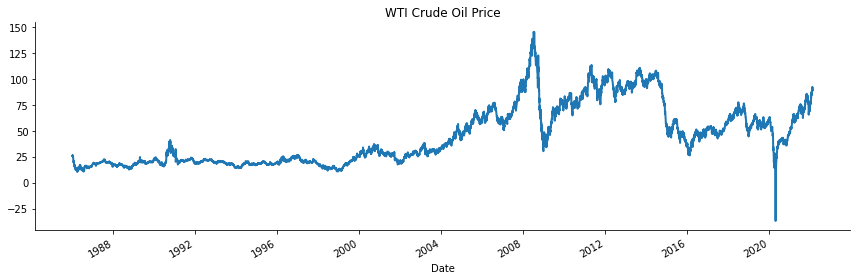

In [74]:
oil.plot(lw=2, title='WTI Crude Oil Price', figsize=(12, 4))
sns.despine()
plt.tight_layout();

In [75]:
symbol = 'WIKI/AAPL'  # or 'AAPL.US'
aapl_df=quandl.get(symbol, api_key=api_key).squeeze()

In [81]:
aapl_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


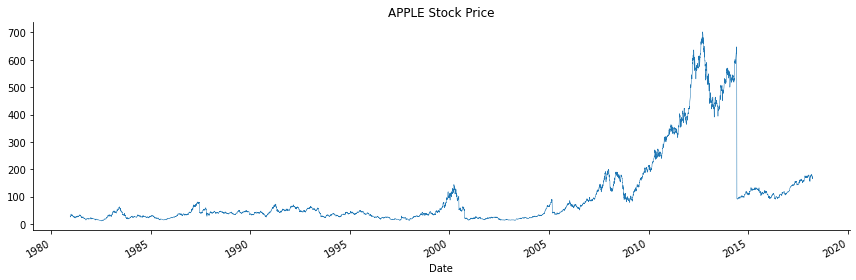

In [83]:
aapl_df['Close'].plot(lw=0.5, title='APPLE Stock Price', figsize=(12, 4))
sns.despine()
plt.tight_layout();